In [1]:
import pandas as pd

In [2]:
%pip install scikit-fuzzy --upgrade

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('penguin.csv')
data.shape

(3430, 11)

In [6]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight,2021
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021


In [7]:
data.rename(index=str, columns={
    'bill_length_mm' : 'bill length',
    'bill_depth_mm' : 'bill depth',
    'flipper_length_mm' : 'flipper length',
    'body_mass_g' : 'body mass (gr)'
}, inplace=True)

In [8]:
data_fixed = data.drop(['island','sex','diet','life_stage','health_metrics','year'], axis=1)
data_fixed

,species,bill length,bill depth,flipper length,body mass (gr)
0,Adelie,53.4,17.8,219.0,5687.0
1,Adelie,49.3,18.1,245.0,6811.0
2,Adelie,55.7,16.6,226.0,5388.0
3,Adelie,38.0,15.6,221.0,6262.0
4,Adelie,60.7,17.9,177.0,4811.0
...,...,...,...,...,...
3425,Gentoo,44.0,20.4,252.0,6447.0
3426,Gentoo,54.5,25.2,245.0,6872.0
3427,Gentoo,51.4,20.4,258.0,7409.0
3428,Gentoo,55.9,20.5,247.0,6491.0


In [9]:
X = data_fixed.iloc[:, 1:5].values
X

array([[  53.4,   17.8,  219. , 5687. ],
       [  49.3,   18.1,  245. , 6811. ],
       [  55.7,   16.6,  226. , 5388. ],
       ...,
       [  51.4,   20.4,  258. , 7409. ],
       [  55.9,   20.5,  247. , 6491. ],
       [  43.9,   22.9,  206. , 6835. ]])

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
X.shape

(3430, 4)

In [12]:
X.T.shape

(4, 3430)

In [13]:
import numpy as np
import skfuzzy as skfuzzy

r = skfuzzy.cmeans(data = X.T, c = 3, m = 2, error = 0.0001, maxiter = 1000, init=None)
r

(array([[ 1.35650186e+00,  7.06898591e-01,  1.25873032e+00,
          1.25877192e+00],
        [-5.47712412e-01, -7.85744203e-01, -7.97736483e-01,
         -8.11051722e-01],
        [-3.27233359e-01,  3.54304977e-01,  2.51474536e-04,
          3.90185501e-03]]),
 array([[0.50960857, 0.78366731, 0.47552922, ..., 0.8699504 , 0.99607296,
         0.48697155],
        [0.15324749, 0.06768607, 0.19840118, ..., 0.04136597, 0.0011757 ,
         0.13272908],
        [0.33714394, 0.14864662, 0.32606961, ..., 0.08868363, 0.00275134,
         0.38029937]]),
 array([[0.53161334, 0.54898536, 0.40798926, ..., 0.05509929, 0.57184519,
         0.39173815],
        [0.18236885, 0.27279595, 0.49569598, ..., 0.71587651, 0.14035422,
         0.18692636],
        [0.28601782, 0.1782187 , 0.09631476, ..., 0.22902419, 0.28780059,
         0.42133549]]),
 array([[1.42139734, 1.02346232, 1.7179202 , ..., 0.94527864, 0.13244791,
         1.85843024],
        [2.59201304, 3.48247543, 2.65961923, ..., 4.3349637 ,

In [26]:
previsoes_porcentagem = r[1]
previsoes_porcentagem
previsoes_porcentagem[0][0]
previsoes_porcentagem[1][0]
previsoes_porcentagem[2][0]
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] +previsoes_porcentagem[2][0]
previsoes = previsoes_porcentagem.argmax(axis=0)
previsoes

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

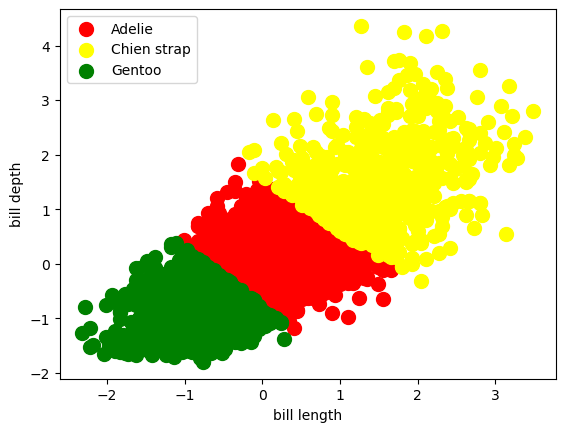

In [27]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Adelie')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'yellow', label = 'Chien strap')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'green', label = 'Gentoo')
plt.xlabel('bill length')
plt.ylabel('bill depth')
plt.legend()

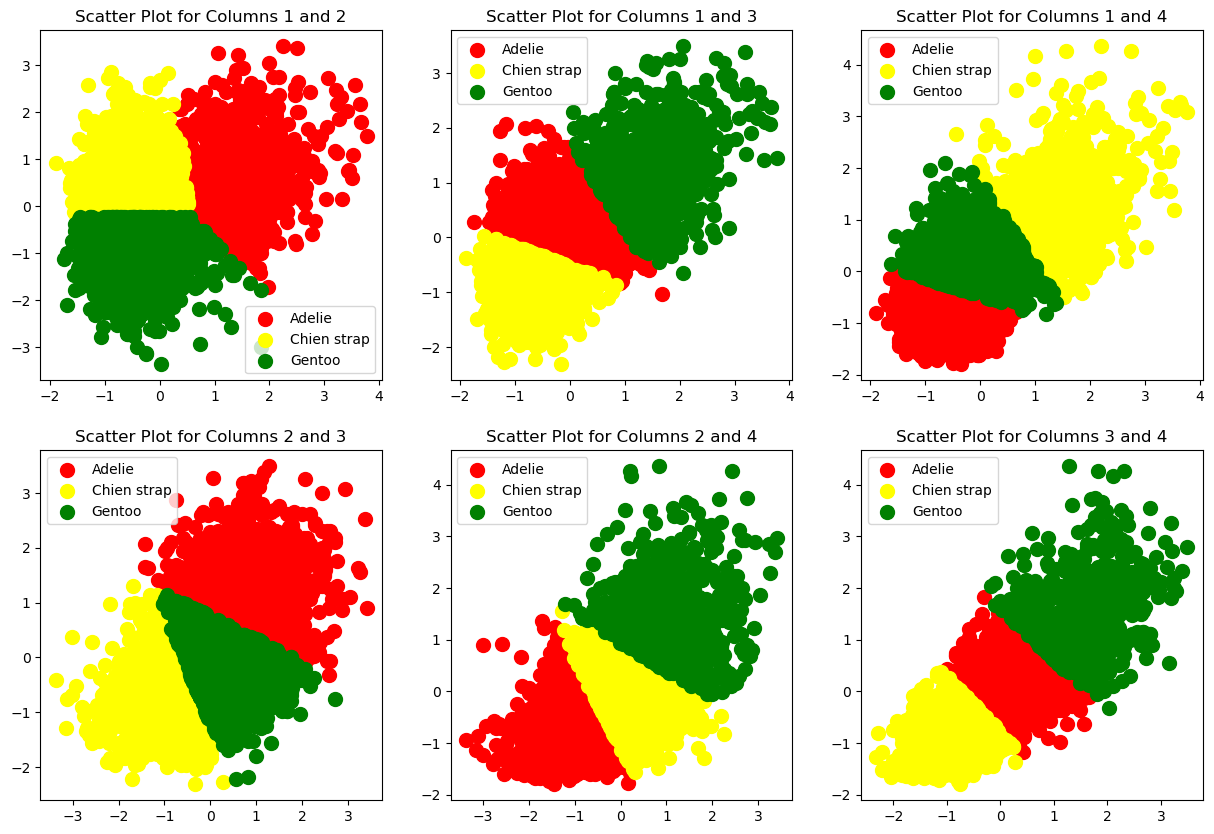

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import skfuzzy

# Assuming 'previsoes' is defined somewhere in your code
column_pairs = [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

# Create a figure to hold the subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for k, (col1, col2) in enumerate(column_pairs):
    # Select the columns for the current combination
    X = data_fixed.iloc[:, [col1, col2]].values

    # Standardize the data
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Perform fuzzy clustering
    r = skfuzzy.cmeans(data=X.T, c=3, m=2, error=0.01, maxiter=10000, init=None)

    # Assign clusters
    previsoes = np.argmax(r[1], axis=0)

    # Scatter plot for the current combination
    axs[k // 3, k % 3].scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s=100, c='red', label='Adelie')
    axs[k // 3, k % 3].scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s=100, c='yellow', label='Chien strap')
    axs[k // 3, k % 3].scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s=100, c='green', label='Gentoo')
    axs[k // 3, k % 3].set_title(f'Scatter Plot for Columns {col1} and {col2}')
    axs[k // 3, k % 3].legend()

# Show the plots
plt.show()

In [29]:
data_fixed['Cluster_Labels'] = previsoes

In [30]:
from IPython.display import display
display(data_fixed)

,species,bill length,bill depth,flipper length,body mass (gr),Cluster_Labels
0,Adelie,53.4,17.8,219.0,5687.0,0
1,Adelie,49.3,18.1,245.0,6811.0,2
2,Adelie,55.7,16.6,226.0,5388.0,0
3,Adelie,38.0,15.6,221.0,6262.0,0
4,Adelie,60.7,17.9,177.0,4811.0,1
...,...,...,...,...,...,...
3425,Gentoo,44.0,20.4,252.0,6447.0,2
3426,Gentoo,54.5,25.2,245.0,6872.0,2
3427,Gentoo,51.4,20.4,258.0,7409.0,2
3428,Gentoo,55.9,20.5,247.0,6491.0,2


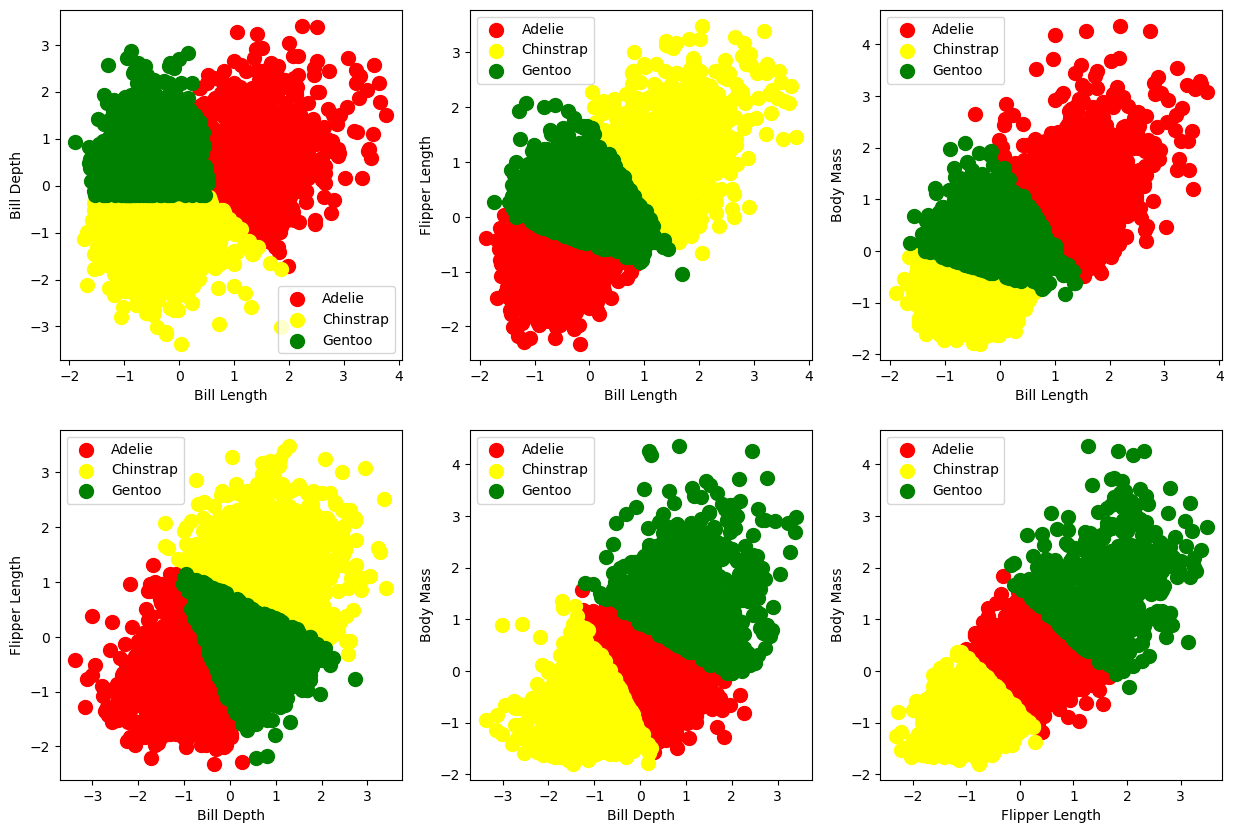

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import skfuzzy

# Assuming 'previsoes' is defined somewhere in your code
column_pairs = [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

# Create a figure to hold the subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Mapping column indices to their corresponding labels
column_labels = {1: 'Bill Length', 2: 'Bill Depth', 3: 'Flipper Length', 4: 'Body Mass'}

for k, (col1, col2) in enumerate(column_pairs):
    # Select the columns for the current combination
    X = data_fixed.iloc[:, [col1, col2]].values

    # Standardize the data
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Perform fuzzy clustering
    r = skfuzzy.cmeans(data=X.T, c=3, m=2, error=0.01, maxiter=10000, init=None)

    # Assign clusters
    previsoes = np.argmax(r[1], axis=0)

    # Scatter plot for the current combination
    axs[k // 3, k % 3].scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s=100, c='red', label='Adelie')
    axs[k // 3, k % 3].scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s=100, c='yellow', label='Chinstrap')
    axs[k // 3, k % 3].scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s=100, c='green', label='Gentoo')

    # Set labels for x and y axes
    axs[k // 3, k % 3].set_xlabel(column_labels[col1])
    axs[k // 3, k % 3].set_ylabel(column_labels[col2])

    axs[k // 3, k % 3].legend()

# Show the plots
plt.show()

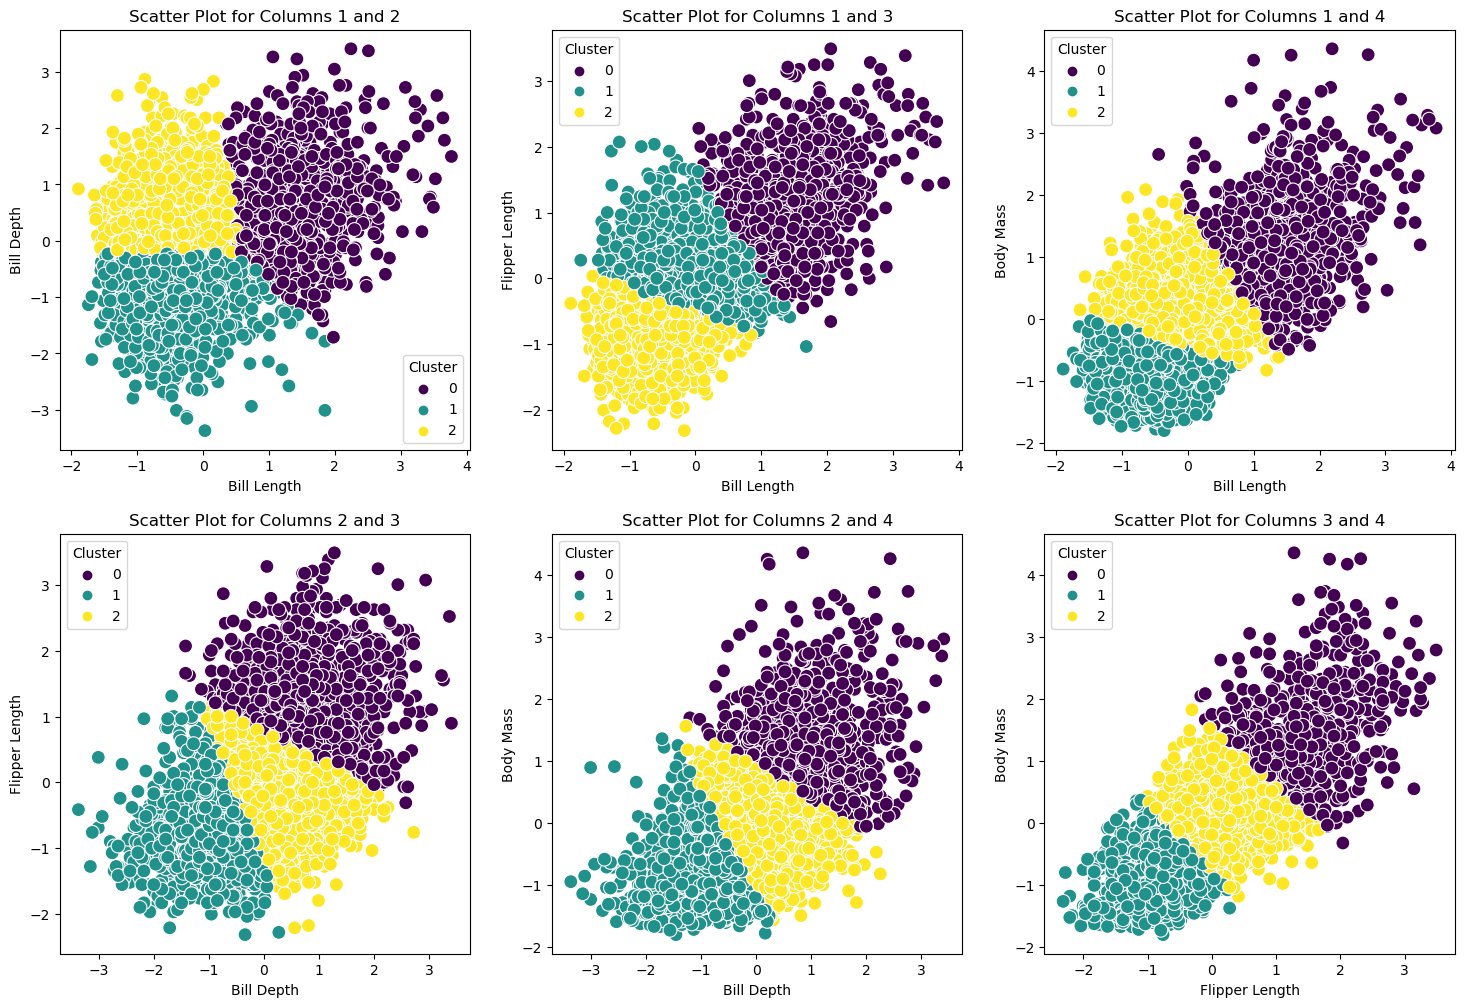

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import skfuzzy

# Assuming 'previsoes' is defined somewhere in your code
column_pairs = [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

# Create a figure to hold the subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Mapping column indices to their corresponding labels
column_labels = {1: 'Bill Length', 2: 'Bill Depth', 3: 'Flipper Length', 4: 'Body Mass'}

for k, (col1, col2) in enumerate(column_pairs):
    # Select the columns for the current combination
    X = data_fixed.iloc[:, [col1, col2]].values

    # Standardize the data
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Perform fuzzy clustering
    r = skfuzzy.cmeans(data=X.T, c=3, m=2, error=0.0001, maxiter=10000, init=None)

    # Assign clusters
    previsoes = np.argmax(r[1], axis=0)

    # Create a DataFrame for the data
    df = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'Cluster': previsoes})

    # Scatter plot for the current combination using seaborn
    sns.scatterplot(data=df, x='X1', y='X2', hue='Cluster', palette='viridis', ax=axs[k // 3, k % 3], s=100)

    axs[k // 3, k % 3].set_title(f'Scatter Plot for Columns {col1} and {col2}')
    axs[k // 3, k % 3].set_xlabel(column_labels[col1])
    axs[k // 3, k % 3].set_ylabel(column_labels[col2])

# Show the plots
plt.show()

c:\Users\nabilafajri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


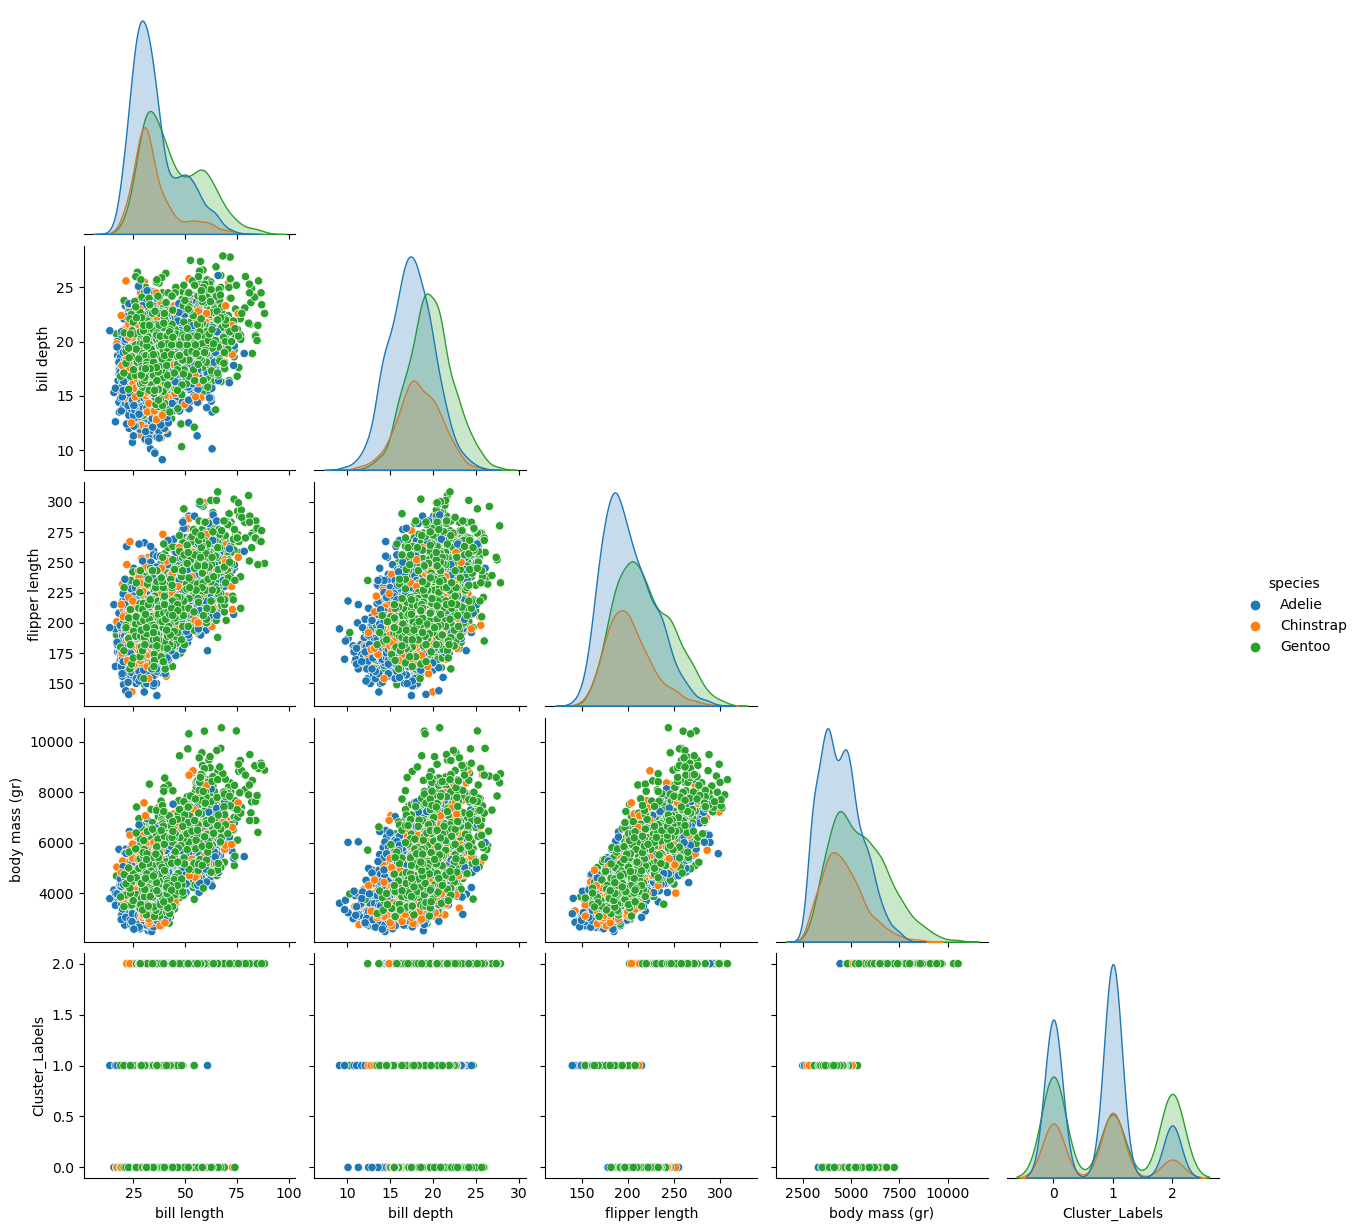

In [36]:
sns.pairplot(data_fixed, corner=True, hue='species')
plt.show()

In [37]:
# Assuming 'previsoes' is defined somewhere in your code
column_pairs = [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

# Create a figure to hold the subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Mapping column indices to their corresponding labels
column_labels = {1: 'Bill Length', 2: 'Bill Depth', 3: 'Flipper Length', 4: 'Body Mass'}

for k, (col1, col2) in enumerate(column_pairs):
    # Select the columns for the current combination
    X = data_fixed.iloc[:, [col1, col2]].values

    # Standardize the data
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Perform fuzzy clustering
    r = skfuzzy.cmeans(data=X.T, c=3, m=2, error=0.01, maxiter=10000, init=None)

    # Assign clusters
    previsoes = np.argmax(r[1], axis=0)

    # Scatter plot for the current combination
    axs[k // 3, k % 3].scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s=100, c='red', label='Adelie')
    axs[k // 3, k % 3].scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s=100, c='yellow', label='Chinstrap')
    axs[k // 3, k % 3].scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s=100, c='green', label='Gentoo')

    # Set labels for x and y axes
    axs[k // 3, k % 3].set_xlabel(column_labels[col1])
    axs[k // 3, k % 3].set_ylabel(column_labels[col2])

    # Set limits to ensure non-negative values
    axs[k // 3, k % 3].set_xlim(left=0)
    axs[k // 3, k % 3].set_ylim(bottom=0)

    axs[k // 3, k % 3].legend()

# Show the plots
plt.show()


Dengan menambahkan axs[k // 3, k % 3].set_xlim(left=0) dan axs[k // 3, k % 3].set_ylim(bottom=0), kita memastikan bahwa nilai minimum pada sumbu x dan y adalah 0.

SyntaxError: invalid syntax (164653997.py, line 43)

In [41]:
datafixed = data_fixed.sort_values(by='bill length', ascending=True)
datafixed

,species,bill length,bill depth,flipper length,body mass (gr),Cluster_Labels
2056,Adelie,13.6,21.0,196.0,3778.0,1
64,Adelie,15.6,15.3,215.0,4121.0,0
2646,Adelie,16.3,15.7,164.0,3992.0,1
1318,Adelie,16.3,12.6,195.0,3515.0,1
876,Gentoo,16.8,20.7,190.0,4678.0,0
...,...,...,...,...,...,...
3123,Gentoo,85.0,21.5,248.0,6405.0,2
840,Gentoo,85.3,25.6,268.0,8938.0,2
1547,Gentoo,86.5,24.5,267.0,9145.0,2
3201,Gentoo,86.8,23.4,276.0,9060.0,2
